# CNN (Convolutional Neural Network) Model

In [1]:
import numpy
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import fashion_mnist

(X_train , y_train) , (X_test, y_test) = fashion_mnist.load_data()

print("Train Set Dimension (X): {}".format(X_train.shape))
print("Train Set Dimension (y):{} ".format(y_train.shape))
print("Test Set Dimension (X): {}".format(X_test.shape))
print("Test Set Dimension (y): {}".format(y_test.shape))


fashion_list = {0:"T-shirt/top", 1 : "Trouser", 2:"Pullover",3:"Dress",4:"Coat", 5 : "Sandal", 6: "Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"   }

plt.figure(figsize=(15,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i] , cmap="gray")
    plt.title("{}".format(fashion_list[y_train[i]]))
    plt.axis("off")
plt.show()

Train Set Dimension (X): (60000, 28, 28)
Train Set Dimension (y):(60000,) 
Test Set Dimension (X): (10000, 28, 28)
Test Set Dimension (y): (10000,)


<Figure size 1500x400 with 20 Axes>

In [2]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

print(X_train.shape, '\n' , X_test.shape)

(60000, 28, 28, 1) 
 (10000, 28, 28, 1)


In [3]:
from keras.utils import to_categorical

y_train_ctg =to_categorical(y_train , 10)

y_test_ctg =to_categorical(y_test , 10)

print(y_train_ctg.shape , "\n", y_test_ctg.shape)

(60000, 10) 
 (10000, 10)


In [17]:
img_row = X_train.shape[1]
img_col = X_train.shape[2]
RGB_number = X_train.shape[3]

print(img_row,img_col , RGB_number)

28 28 1


In [24]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D , Flatten 

model = Sequential()
model.add(Conv2D(filters= 8 , kernel_size= 5 , activation = "relu", strides=(2,2) , input_shape=( img_row , img_col , RGB_number)))
model.add(Flatten()) # Düşleştirme
model.add(Dense(10 , activation="softmax")) # 10 nöronlu katman 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 12, 12, 8)         208       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                11530     
Total params: 11,738
Trainable params: 11,738
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=['accuracy'])

model.fit(X_train , y_train_ctg , validation_split=0.2 , epochs=3 , batch_size= 32)

Epoch 1/3
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0701 - accuracy: 0.7543 - val_loss: 0.5253 - val_accuracy: 0.8175
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4810 - accuracy: 0.8289 - val_loss: 0.4879 - val_accuracy: 0.8271
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4299 - accuracy: 0.8479 - val_loss: 0.4481 - val_accuracy: 0.8376


In [26]:
correct_train = model.evaluate(X_train , y_train_ctg)[1]
correct_test = model.evaluate(X_test , y_test_ctg)[1]

print("Train set correct value : {:.3f}".format(correct_train))
print("Test set correct value : {:.3f}".format(correct_test))


313/313 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8265
Train set correct value : 0.853
Test set correct value : 0.826


# Padding 

girdi görüntüsünün etrafına 0 ekleyerek yapılır. Böylece kenarlarda işlem yapılırken konvolüsyon filtresi 0 olan piksellerle üst üste gelmekte ve boyut kaybı önlenmektedir.

# Stride

filtrenin her defasında kaç piksel kayacağını belirtir. Bu da çıktını boyutunu etkilemektedir.

# CNN'de performans artırma yöntemleri

- Eğer modelimiz çok karmaşıksa overfitting ile karşılaşabiliriz. Bu durum hem test kümesinde düşük performansa hem de tahmin edilecek fazla parametre olacağından eğitim süresinin çok uzun sürmesine yol açmaktadır. Overfitting'i engellemek için uygulayabileceğimiz bazı yöntemler mevcuttur.

- Pooling
- Dropout

- Ara katmanlarda normalizasyon yapmamızı sağlayan Batch Normalizasyon ve özellikle veri kümemizdeki veri sayısı çok fazla değilse kullanabileceğimiz veri artırma (data augmentation) yöntemleri de modelimizin performansını artırmaktadır.

# Pooling

Resimleri işlerken çözünürlüğü azaltmak istediğimiz durumlar bulunmaktadır. Resmin içeriğini tahmin başarısının orijinal boyutlara bağlı olmadığı durumlarda, çözünürlüğü azaltmak parametre sayısını azaltacağı için modelimizin daha hızlı eğitilimesini sağlayacaktır. Resmin boyutlarını azaltmak için pooling metodunu kullanmaktayız.

Pooling katmanı da bir çeşit konvolüsyon gibi düşünebilir. Konvolüsyon işleminde her bir pencere filtre ile nokta çarpımına tabi tutularken, pooling işleminde penceredeki en büyük değer ya da ortalama değer çıktı olarak aktarılmaktadır.

Keras'ta pooling işlemi diğer katmanlar gibi modele katman ekleyerek yapılmaktadır. Bunun için modele MaxPool2D ya da AvgPool2D katmanı ekleyebiliriz.

# Dropout

Overfittingi önlemek için kullanılan yaygın yöntemlerden biri de Dropout'dur. Dropout yöntemi rastgele bir şekilde bazı nöronları pasif hale geçirme yöntemidir. Bu nöronlar dikkate alınmaz ve ağırlıkları güncellenmez.

In [28]:
from keras.layers import MaxPool2D, AvgPool2D , Dropout

model = Sequential()
model.add(Conv2D(10, kernel_size = 3 , activation= "relu", input_shape=(img_row,img_col,1)))
model.add(MaxPool2D(2))
model.add(Dropout(0.50))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
                 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 5)         205       
_________________________________________________________________
flatten_3 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7210      
Total params: 7,515
Trainable params: 7,515
Non-trainable params: 0
____________________________________________________

In [29]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=['accuracy'])

model.fit(X_train , y_train_ctg , validation_split=0.2 , epochs=3 , batch_size= 32)

Epoch 1/3
1500/1500 [==============================] - 10s 7ms/step - loss: 2.0552 - accuracy: 0.6720 - val_loss: 0.5955 - val_accuracy: 0.8069
Epoch 2/3
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6028 - accuracy: 0.7881 - val_loss: 0.4736 - val_accuracy: 0.8382
Epoch 3/3
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5228 - accuracy: 0.8162 - val_loss: 0.4443 - val_accuracy: 0.8533


In [30]:
correct_train = model.evaluate(X_train , y_train_ctg)[1]
correct_test = model.evaluate(X_test , y_test_ctg)[1]

print("Train set correct value : {:.3f}".format(correct_train))
print("Test set correct value : {:.3f}".format(correct_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.8429
Train set correct value : 0.859
Test set correct value : 0.843


# Batch Normalizasyon

Batch normalizasyonu sayesinde ise aradaki katmanların çıktılarının ortalaması 0, ve standart sapması 1 olacak şekilde normalize edilmektedir.

In [31]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(filters= 8 , kernel_size = 5 , activation= "relu", strides=(2,2), input_shape = (img_row , img_col , 1 )))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 12, 12, 8)         208       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 8)         32        
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                11530     
Total params: 11,770
Trainable params: 11,754
Non-trainable params: 16
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=['accuracy'])

model.fit(X_train, y_train_ctg , validation_split= 0.1 , epochs= 3 , batch_size=32)

Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4753 - accuracy: 0.8306 - val_loss: 0.3968 - val_accuracy: 0.8607
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3556 - accuracy: 0.8727 - val_loss: 0.3766 - val_accuracy: 0.8702
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3252 - accuracy: 0.8819 - val_loss: 0.3617 - val_accuracy: 0.8742


In [35]:
correct_train = model.evaluate(X_train , y_train_ctg)[1]
correct_test = model.evaluate(X_test , y_test_ctg)[1]

print("Train set correct value : {:.3f}".format(correct_train))
print("Test set correct value : {:.3f}".format(correct_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8708
Train set correct value : 0.887
Test set correct value : 0.871


# Veri artırma (data augmentation)

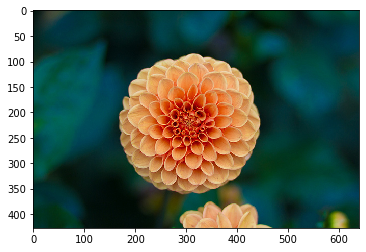

In [37]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array , load_img
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")
plt.imshow(flower)
plt.show()

In [38]:
data_generator = ImageDataGenerator(rotation_range=500,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.5,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

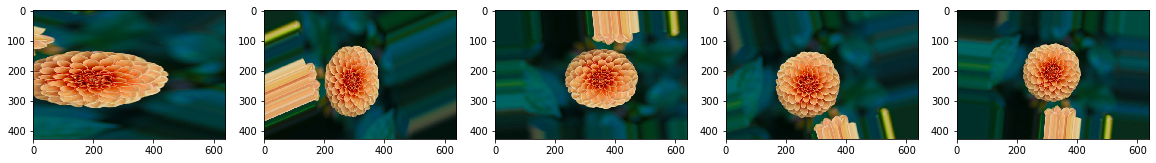

In [49]:
X = img_to_array(flower) #  = (427, 640, 3)
X = X.reshape((1,) + X.shape)#  = (1, 427, 640, 3)

plt.figure(figsize=(20,20))
for i, flower in enumerate(data_generator.flow(X)):
    plt.subplot(1,5,i+1)
    plt.imshow(array_to_img(flower[0]))
    if i == 4 :  # 
        break
    
plt.show()

# Homework

Veri kümesini from keras.datasets import cifar100 komutu ile indirebilirsiniz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from keras.datasets import cifar100

(X_egitim, y_egitim), (X_test, y_test) = cifar100.load_data()

print("Eğitim kümesi boyutu (X) :", X_egitim.shape)
print("Eğitim kümesi boyutu (y) :", y_egitim.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

plt.figure(figsize=(15,4))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_egitim[i], cmap='gray')
    plt.title("{}".format([y_egitim[i]]))
    plt.axis('off')
           
plt.show()

Eğitim kümesi boyutu (X) : (50000, 32, 32, 3)
Eğitim kümesi boyutu (y) : (50000, 1)
Test kümesi boyutu (X)   : (10000, 32, 32, 3)
Test kümesi boyutu (y)   : (10000, 1)


<Figure size 1500x400 with 30 Axes>

In [2]:
X_egitim = X_egitim.reshape(X_egitim.shape[0], 
                            X_egitim.shape[1], 
                            X_egitim.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], 
                        X_test.shape[1], 
                        X_test.shape[2], 3)
print(X_egitim.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
from keras.utils import to_categorical

NUM_CLASSES = 100 # 100 adet farklı sınıf var. 

y_egitim = to_categorical(y_egitim, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


In [6]:
X_egitim = X_egitim.astype("float32")
X_test = X_test.astype("float32")
X_egitim /= 255.0
X_test /= 255.0

In [4]:
img_satır = X_egitim.shape[1]
img_sutun = X_egitim.shape[2]
kanal_sayisi = X_egitim.shape[3]
print(img_satır, img_sutun, kanal_sayisi)

32 32 3


In [5]:
X_egitim.shape

(50000, 32, 32, 3)

In [6]:
y_egitim.shape # 100 = to_categorical 

(50000, 100)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_satır, img_sutun,kanal_sayisi)))

model.add(Conv2D(5, kernel_size=3 , activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(100, activation='softmax')) # Dense = Farklı Sınıf sayısı 
                 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 8)         608       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 5)         365       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 5)         20        
_________________________________________________________________
flatten_4 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               72100     
Total params: 73,093
Trainable params: 73,083
Non-trainable params: 10
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_egitim, y_egitim,validation_split=0.2, epochs=8, batch_size=32)

Epoch 1/8
1250/1250 [==============================] - 10s 8ms/step - loss: 3.3858 - accuracy: 0.2120 - val_loss: 3.5822 - val_accuracy: 0.1744
Epoch 2/8
1250/1250 [==============================] - 9s 7ms/step - loss: 3.2972 - accuracy: 0.2264 - val_loss: 3.5428 - val_accuracy: 0.1786
Epoch 3/8
1250/1250 [==============================] - 9s 8ms/step - loss: 3.2267 - accuracy: 0.2422 - val_loss: 3.4979 - val_accuracy: 0.1966
Epoch 4/8
1250/1250 [==============================] - 10s 8ms/step - loss: 3.1645 - accuracy: 0.2526 - val_loss: 3.4821 - val_accuracy: 0.1949
Epoch 5/8
1250/1250 [==============================] - 10s 8ms/step - loss: 3.1025 - accuracy: 0.2636 - val_loss: 3.5332 - val_accuracy: 0.1930
Epoch 6/8
1250/1250 [==============================] - 10s 8ms/step - loss: 3.0536 - accuracy: 0.2704 - val_loss: 3.6920 - val_accuracy: 0.1777
Epoch 7/8
1250/1250 [==============================] - 10s 8ms/step - loss: 3.0036 - accuracy: 0.2823 - val_loss: 3.5518 - val_accuracy: 0

In [9]:
print(X_egitim.shape)
print(y_egitim.shape)

(50000, 32, 32, 3)
(50000, 100)


In [26]:
correct_train = model.evaluate(X_egitim , y_egitim)
correct_test = model.evaluate(X_test , y_test)

print("Train set correct value : {}".format(correct_train))
print("Test set correct value : {}".format(correct_test))

313/313 [==============================] - 1s 3ms/step - loss: 3.5786 - accuracy: 0.1836
Train set correct value : [3.019355535507202, 0.28213998675346375]
Test set correct value : [3.5785858631134033, 0.18359999358654022]
